### <b>Importing The Libraries

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### <b> Loading The data files

In [173]:
data = pd.read_csv("shopping_behavior_updated.csv")

In [174]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [175]:
data.dropna(inplace=True)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [177]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [180]:
from sklearn.preprocessing import OneHotEncoder
one_enc  = OneHotEncoder()
ed= np.array(data['Payment Method']).reshape(1,-1)
encoded_df =one_enc.fit_transform(ed)
print(encoded_df)

  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 10)	1.0
  (0, 11)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 14)	1.0
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 17)	1.0
  (0, 18)	1.0
  (0, 19)	1.0
  (0, 20)	1.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 24)	1.0
  :	:
  (0, 3875)	1.0
  (0, 3876)	1.0
  (0, 3877)	1.0
  (0, 3878)	1.0
  (0, 3879)	1.0
  (0, 3880)	1.0
  (0, 3881)	1.0
  (0, 3882)	1.0
  (0, 3883)	1.0
  (0, 3884)	1.0
  (0, 3885)	1.0
  (0, 3886)	1.0
  (0, 3887)	1.0
  (0, 3888)	1.0
  (0, 3889)	1.0
  (0, 3890)	1.0
  (0, 3891)	1.0
  (0, 3892)	1.0
  (0, 3893)	1.0
  (0, 3894)	1.0
  (0, 3895)	1.0
  (0, 3896)	1.0
  (0, 3897)	1.0
  (0, 3898)	1.0
  (0, 3899)	1.0


### <b>Doing The Encoding

In [181]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
                    'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used',
                    'Payment Method', 'Frequency of Purchases']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(data[categorical_cols])
encoded_data = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
data = data.drop(columns=categorical_cols)
data = pd.concat([data, encoded_data], axis=1)

numerical_cols = ['Age','Review Rating', 'Previous Purchases']


### <b> This could capture the spending tendency of different age groups.

In [182]:
data['Age_PurchaseAmount'] = data['Age'] * data['Purchase Amount (USD)']
data['PreviousPurchases_ReviewRating'] = data['Previous Purchases'] * data['Review Rating']

data.head()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Age_PurchaseAmount,PreviousPurchases_ReviewRating
0,1,55,53,3.1,14,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2915,43.4
1,2,19,64,3.1,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1216,6.2
2,3,50,73,3.1,23,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3650,71.3
3,4,21,90,3.5,49,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1890,171.5
4,5,45,49,2.7,31,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2205,83.7


## <b>Applying The Kmeans

c:\Users\divyansh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



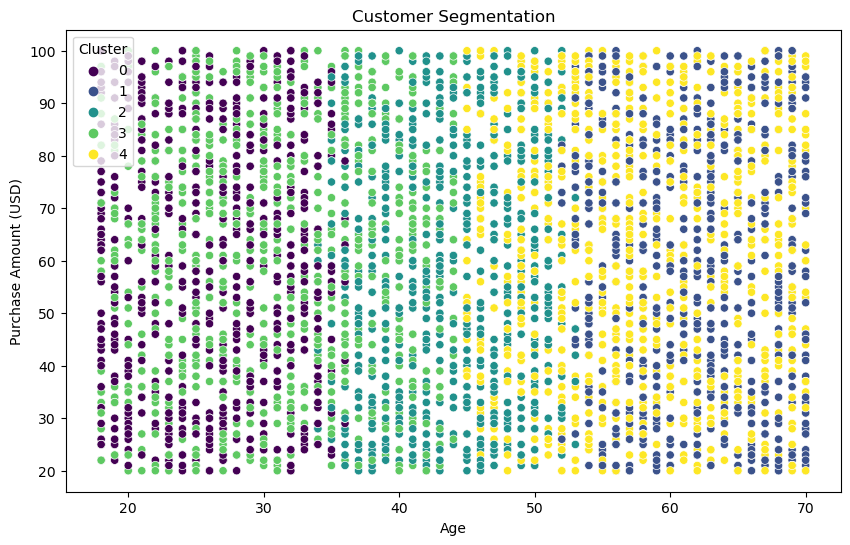

In [183]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[numerical_cols])

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Purchase Amount (USD)', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()

In [184]:
# Scatter Plot with Facets
fig = px.scatter(data, x='Age', y='Purchase Amount (USD)', 
                 color='Category_Clothing', 
                 facet_col='Gender_Male', 
                 title='Purchase Amount vs Age by Gender and Category',
                 labels={'Gender_Male': 'Gender (0=Female, 1=Male)'})
fig.show()


## 3D - Visualisations

In [185]:
fig = px.scatter_3d(data, x='Age', y='Purchase Amount (USD)', z='Previous Purchases', 
                    color='Gender_Male', 
                    title='3D Scatter Plot of Customers',
                    labels={'Gender_Male': 'Gender (0=Female, 1=Male)'})
fig.show()


In [186]:
fig = px.sunburst(data, 
                  path=['Location_Alaska', 'Category_Clothing', 'Subscription Status_Yes'], 
                  values='Purchase Amount (USD)',
                  color='Purchase Amount (USD)',
                  color_continuous_scale='RdBu',
                  title='Sunburst Chart of Customer Segments')
fig.show()


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = data.drop(columns=['Purchase Amount (USD)'])
y = data['Purchase Amount (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.8174683333333336


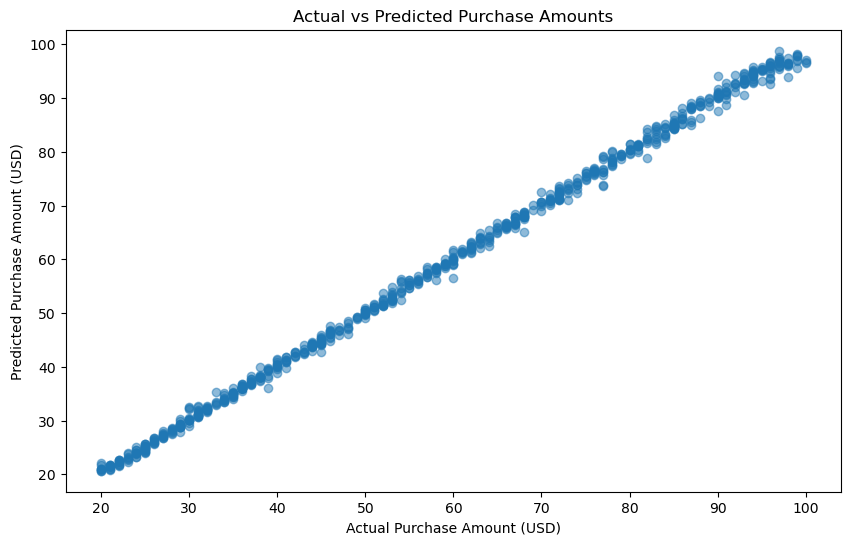

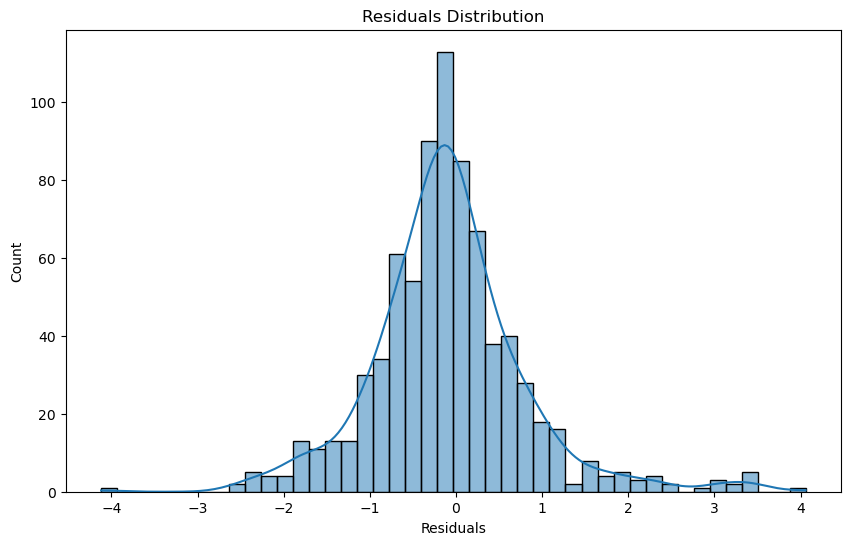

In [189]:
# Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Purchase Amount (USD)')
plt.ylabel('Predicted Purchase Amount (USD)')
plt.title('Actual vs Predicted Purchase Amounts')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()



In [190]:
import plotly.express as px
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
fig = px.bar(importance_df, x='Importance', y='Feature', title='Feature Importances')
fig.show()


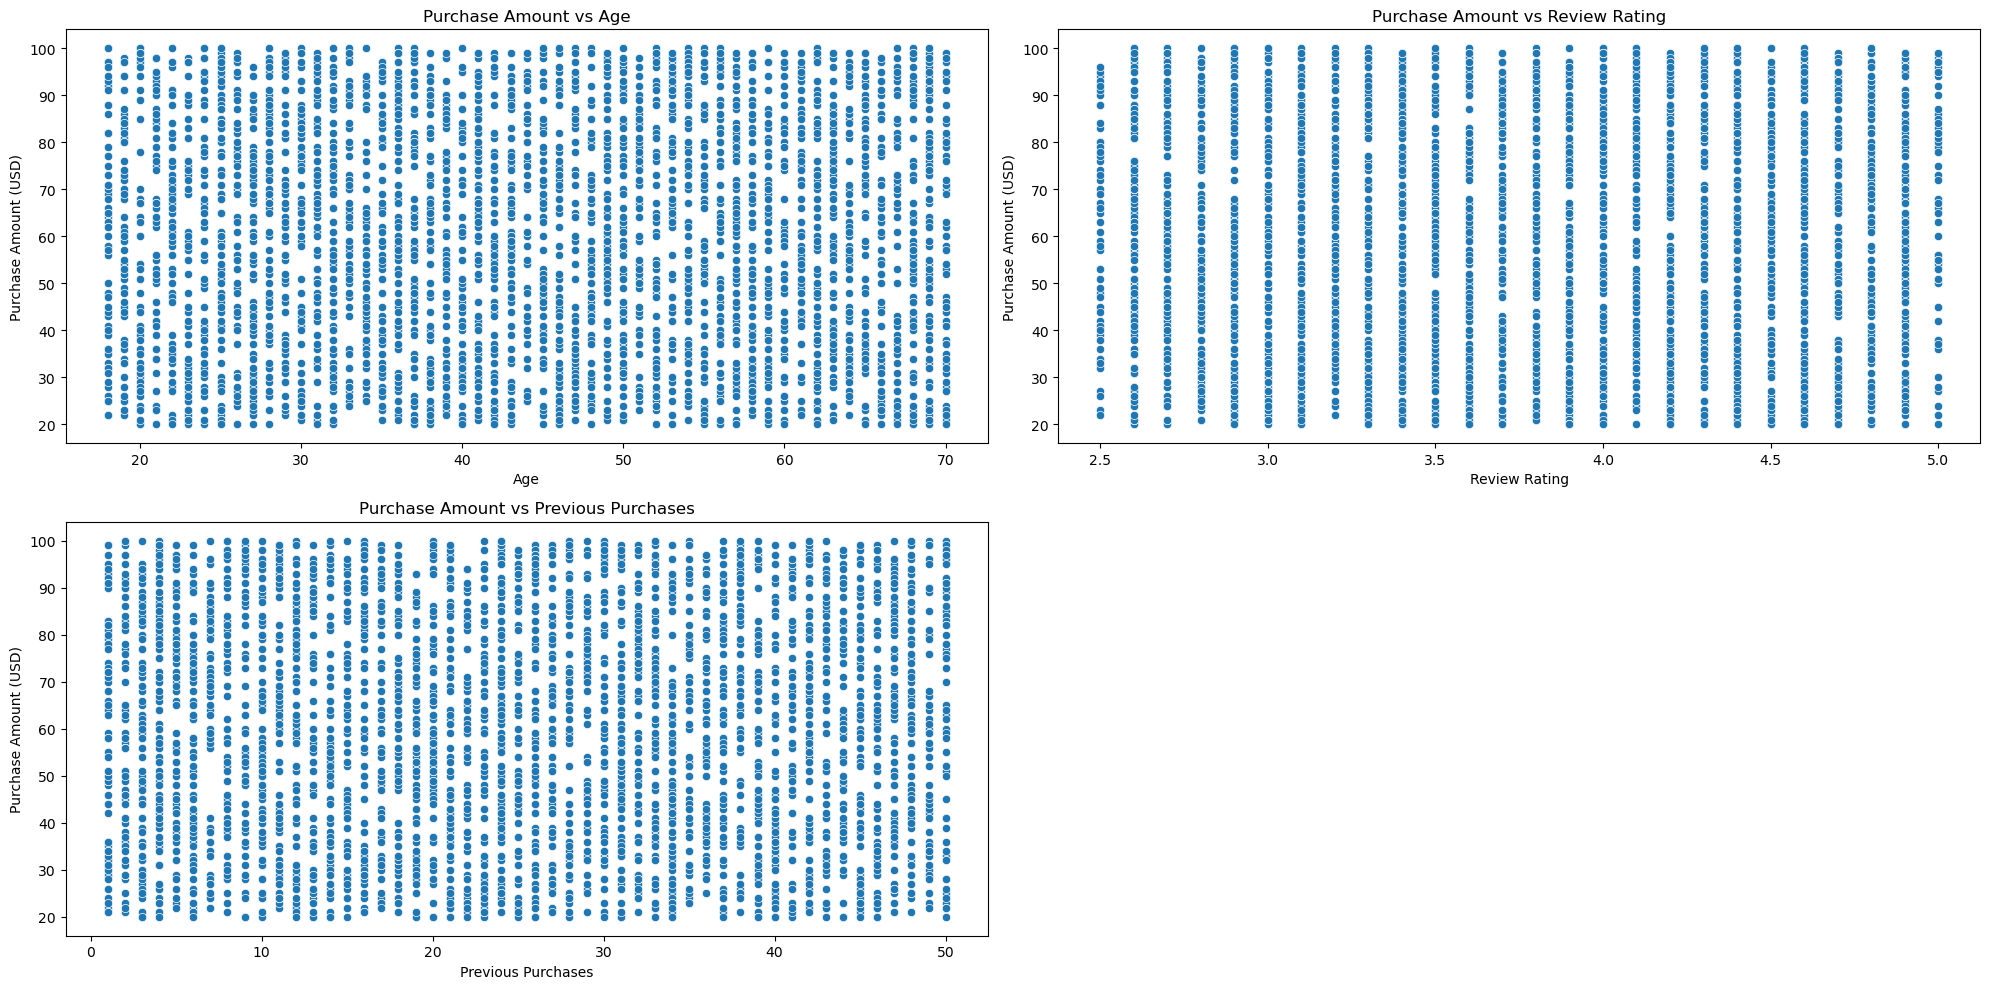

In [191]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=data[col], y=data['Purchase Amount (USD)'])
    plt.title(f'Purchase Amount vs {col}')
plt.tight_layout()
plt.show()



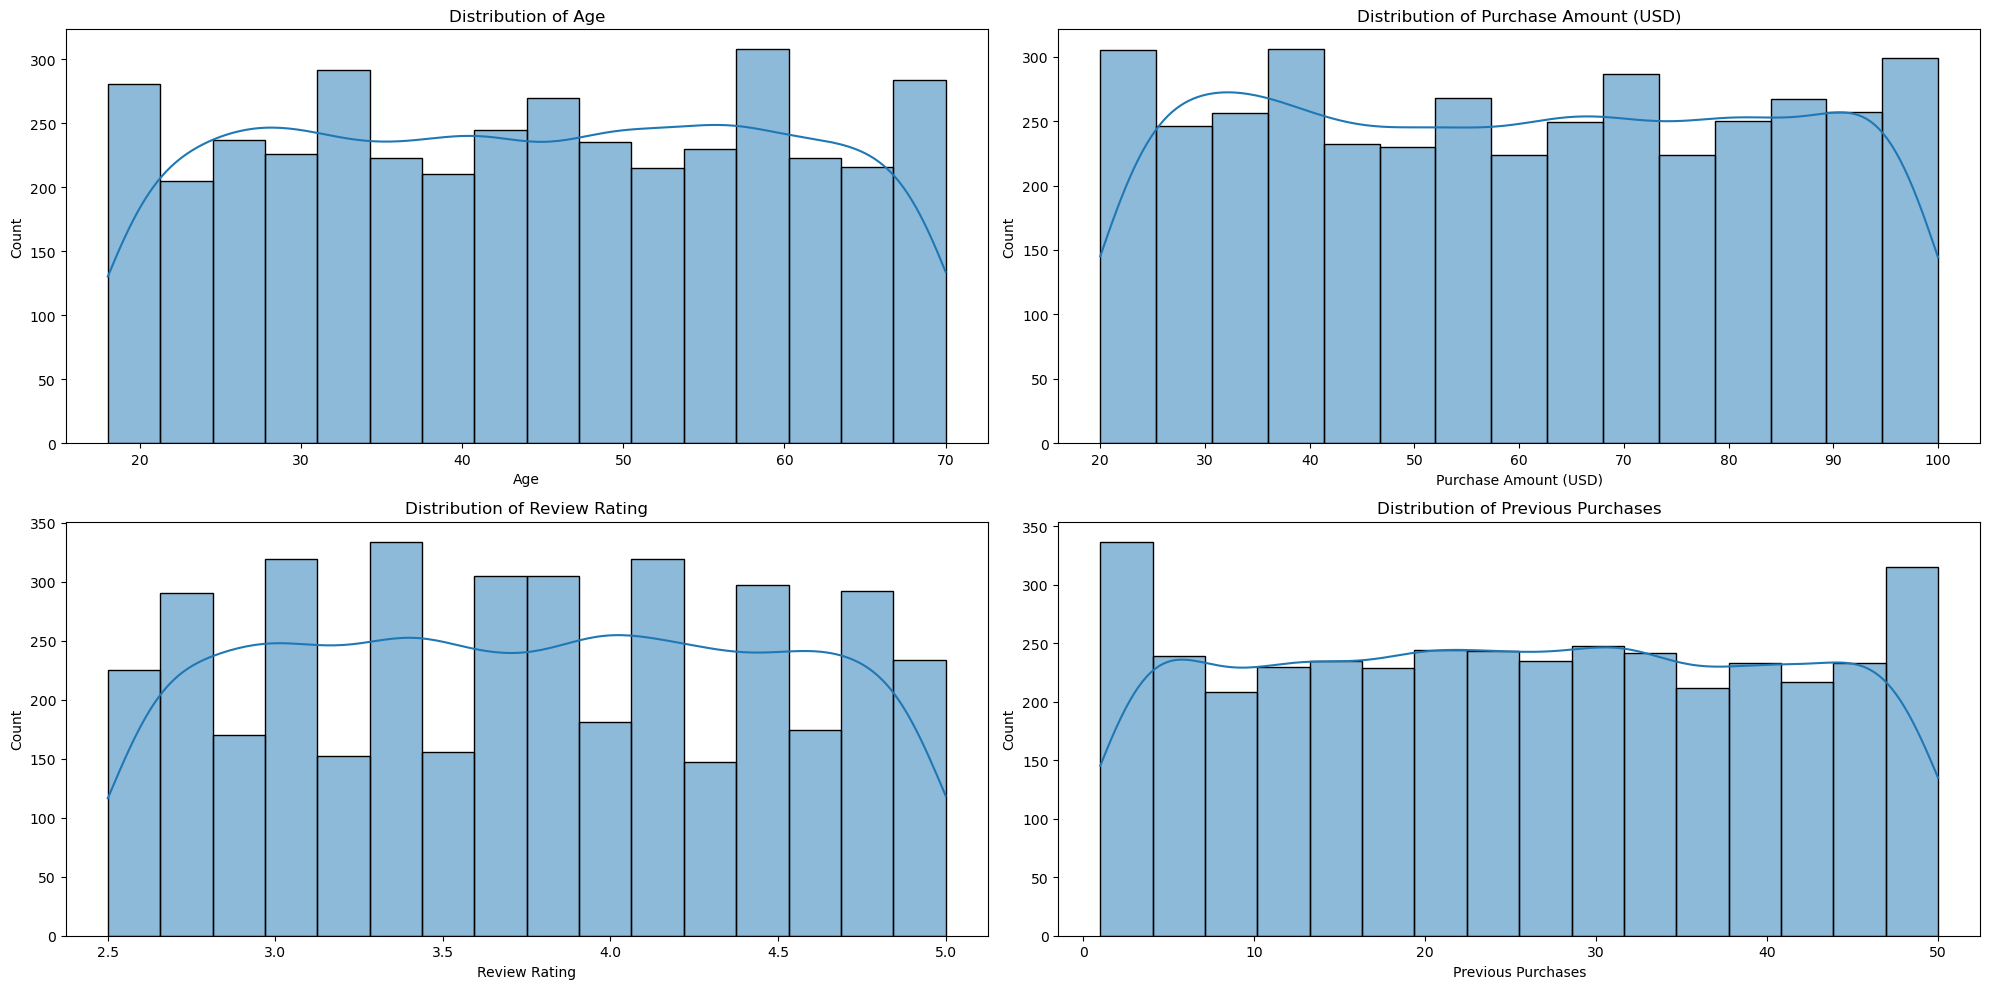

In [192]:
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [187]:

fig = px.treemap(data, 
                 path=['Location_Alaska', 'Category_Clothing'], 
                 values='Purchase Amount (USD)', 
                 color='Purchase Amount (USD)', 
                 color_continuous_scale='Viridis',
                 title='Treemap of Purchase Amount by Location and Category')
fig.show()

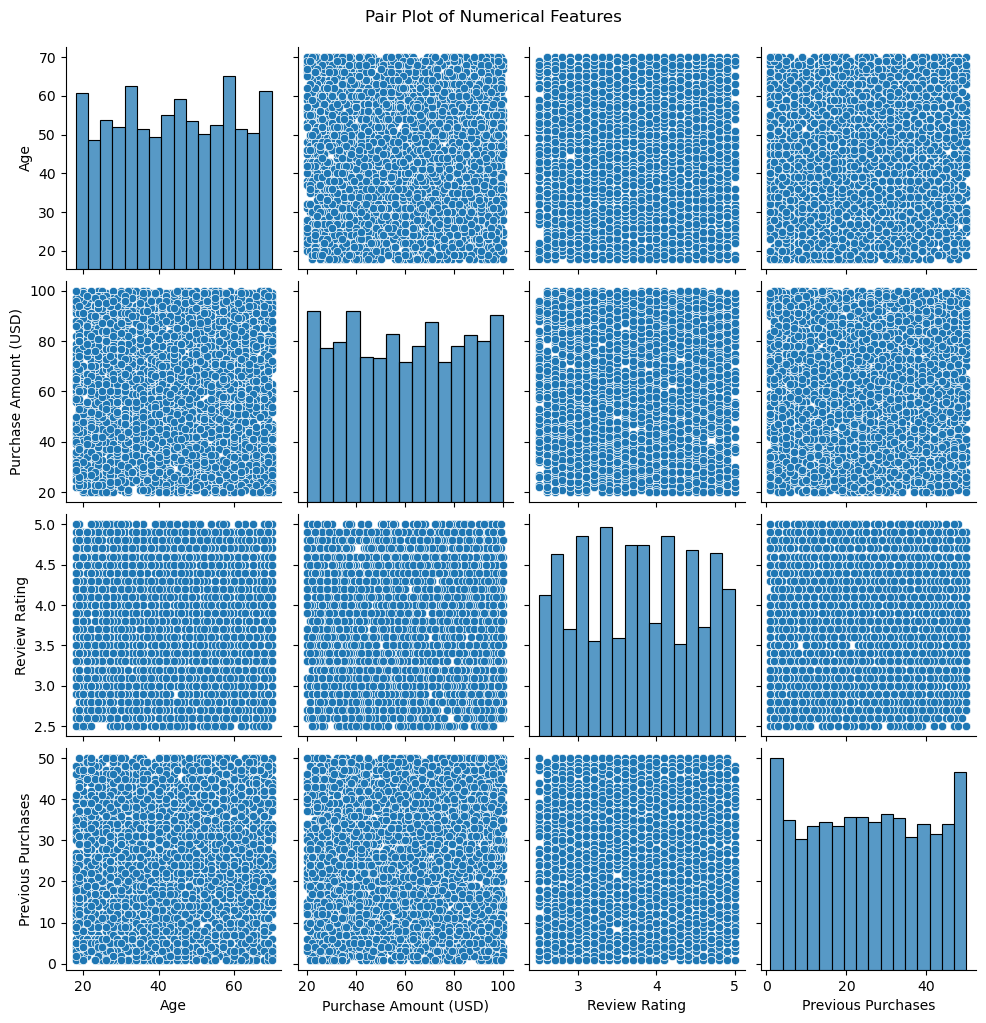

In [193]:
sns.pairplot(data[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


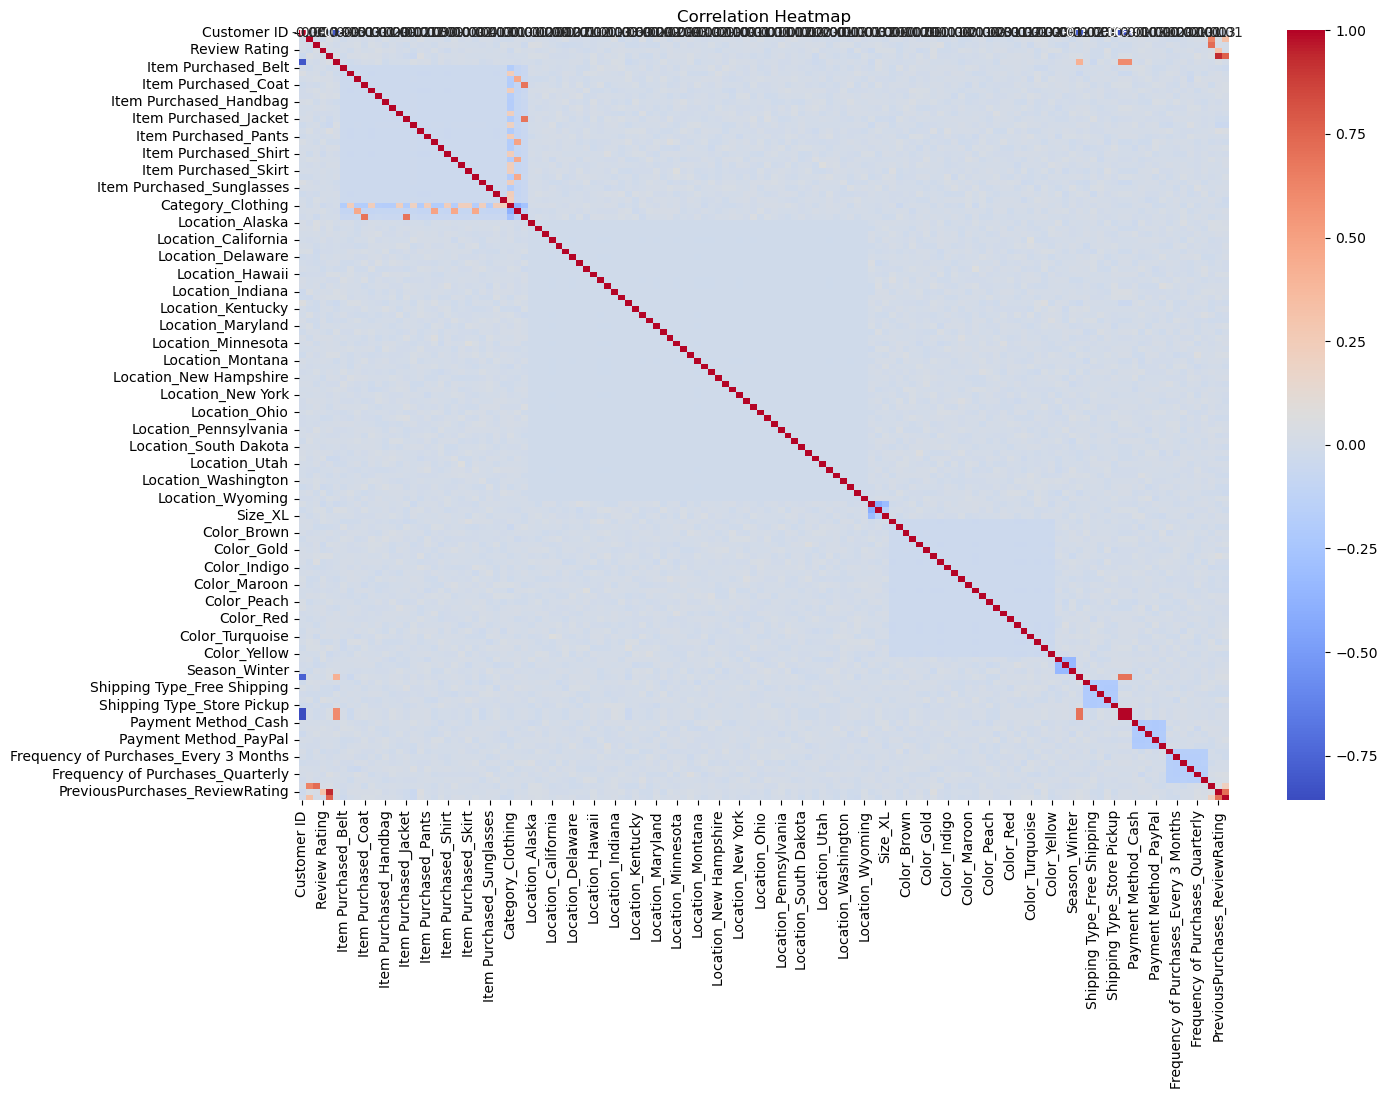

In [194]:
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


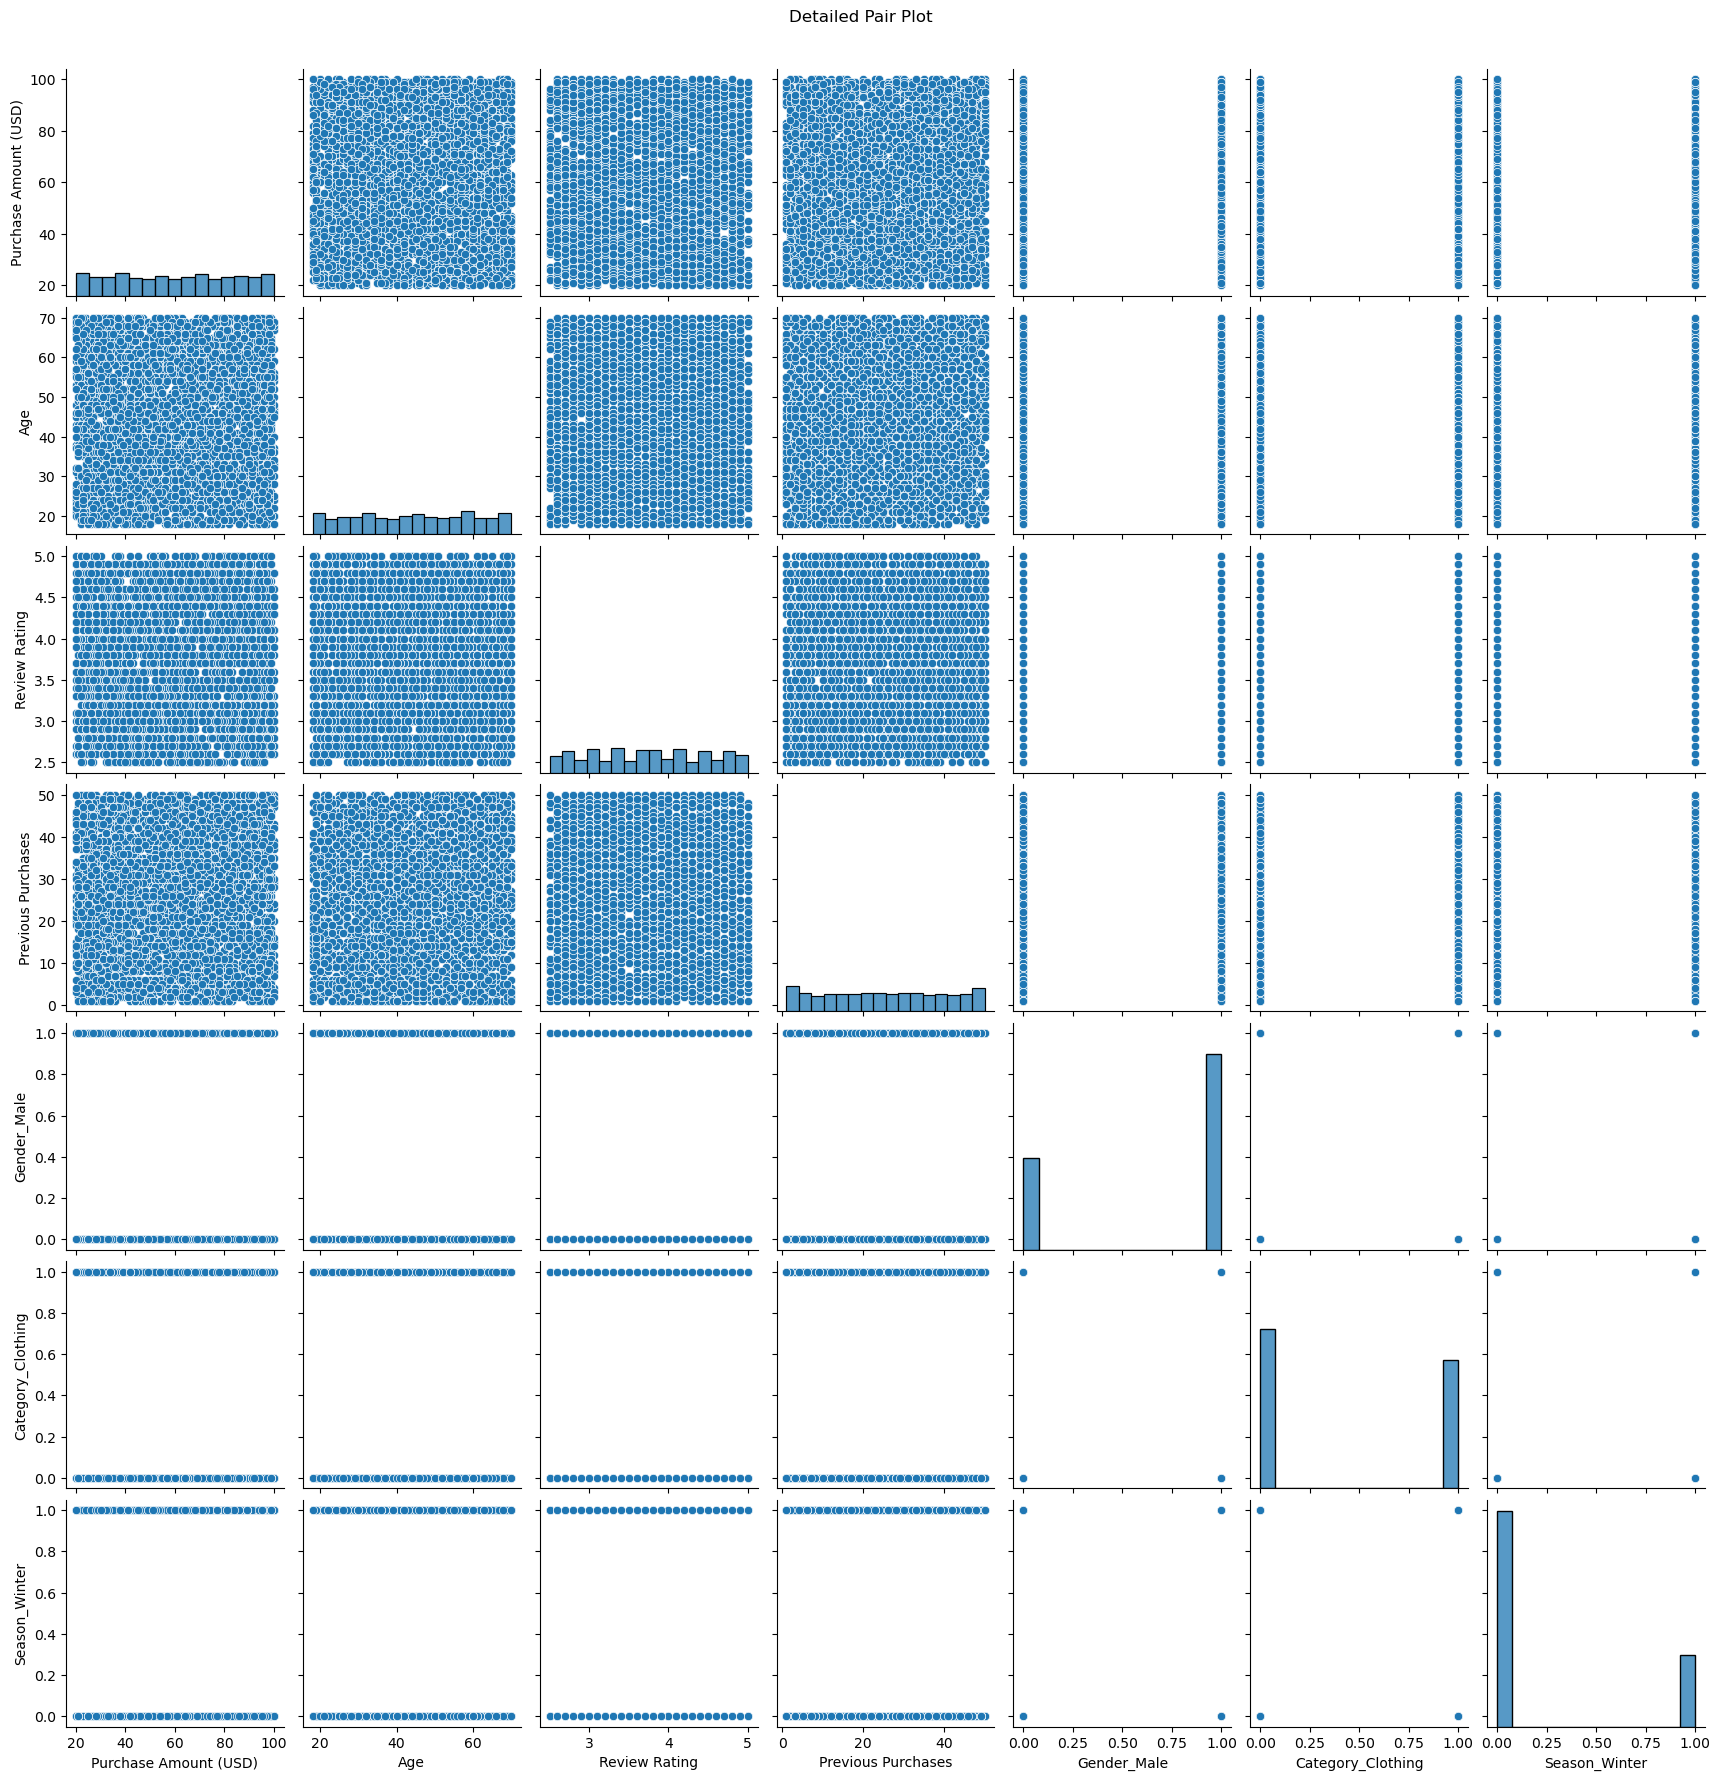

In [195]:
selected_cols = ['Purchase Amount (USD)', 'Age', 'Review Rating', 'Previous Purchases']
selected_cols += ['Gender_Male', 'Category_Clothing', 'Season_Winter']

sns.pairplot(data[selected_cols])
plt.suptitle('Detailed Pair Plot', y=1.02)
plt.show()
